<a id="1"></a>
# <p style="padding:10px;background-color:green;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Bike-Sharing System (BoomBikes)</p>

# PROBLEM STATEMENT

#### This assignment is a programming assignment where in i'll be building a multiple linear regression model for the prediction of demand for shared bikes

A `bike-sharing system` is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A `US bike-sharing` provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


### `The company wants to know:`

1. Which variables are significant in predicting the demand for shared bikes.

2. How well those variables describe the bike demands Based on various meteorological surveys and people's styles,


## `Business Goal:`

I have to build a model for demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [1]:
#Importing all necessary library
# Pandas for Data Frame 
import pandas as pd
# Numpy for advance math operation
import numpy as np
# filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading CSV file
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
#The info() method provides a concise summary of a DataFrame, displaying information
# such as the number of entries, data types, and memory usage, aiding data exploration and analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#shape of data
df.shape

(730, 16)

In [5]:
#The describe() function offers a concise statistical summary.
#It provides count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, 
#and maximum values for numeric data in a DataFrame.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking missing value
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#checking unique values
df.nunique() 

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
df['dteday']

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

##### Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

`- instant :` Its only an index value , we have a default index for the same purpose

`- dteday :` This has the date, Since we already have seperate columns for 'year' & 'month',hence, we can carry out our analysis without this column .

`- casual & registered :` Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.


In [9]:
#droping 
df=df.drop(['dteday','instant','casual','registered'],axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# `Data and information visualization`

In [11]:
# matplot for visualization 
import matplotlib.pyplot as plt
# subpart in matplot for visualization
import seaborn as sns

Taking a copy of main `df` for visulizations `df_for_viz`

In [12]:
df_for_viz = df.copy()

In [13]:
df_for_viz.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
# Encoding/mapping the season,month,weekday,weathersit column for better visulization 
df_for_viz.season=df_for_viz.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_for_viz.mnth = df_for_viz.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df_for_viz.weekday = df_for_viz.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df_for_viz.weathersit = df_for_viz.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
df_for_viz.yr = df_for_viz.yr.map({0:'2018',1:'2019'})

In [15]:
df_for_viz.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


<a id="1"></a>
# <p style="padding:10px;background-color:blue;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Univariate analysis</p>

### Univariate analysis is a type of data analysis that focuses on examining the characteristics of a single variable at a time.

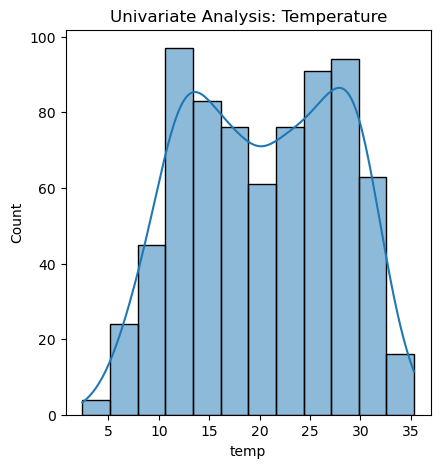

In [16]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_for_viz['temp'], kde=True)
plt.title('Univariate Analysis: Temperature')
plt.show()

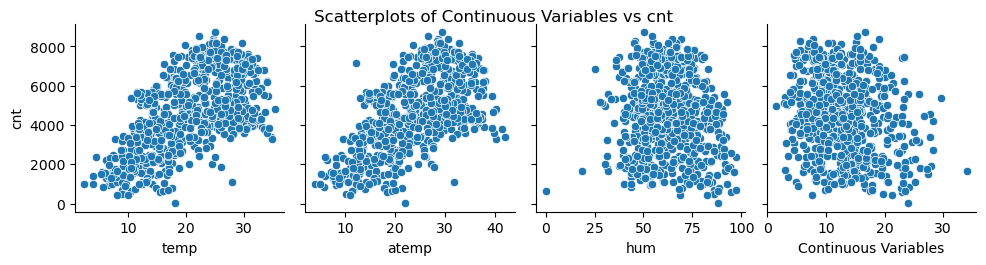

In [17]:
# Create scatterplots to identify linear relationships
sns.pairplot(df_for_viz, x_vars=['temp', 'atemp', 'hum', 'windspeed',
       ], y_vars=['cnt'], kind='scatter')

# Add titles and labels
plt.suptitle("Scatterplots of Continuous Variables vs cnt", y=1.02)
plt.xlabel("Continuous Variables")
plt.ylabel("Count 'cnt'")

# Show the plot
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:pink;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Bivariate</p>


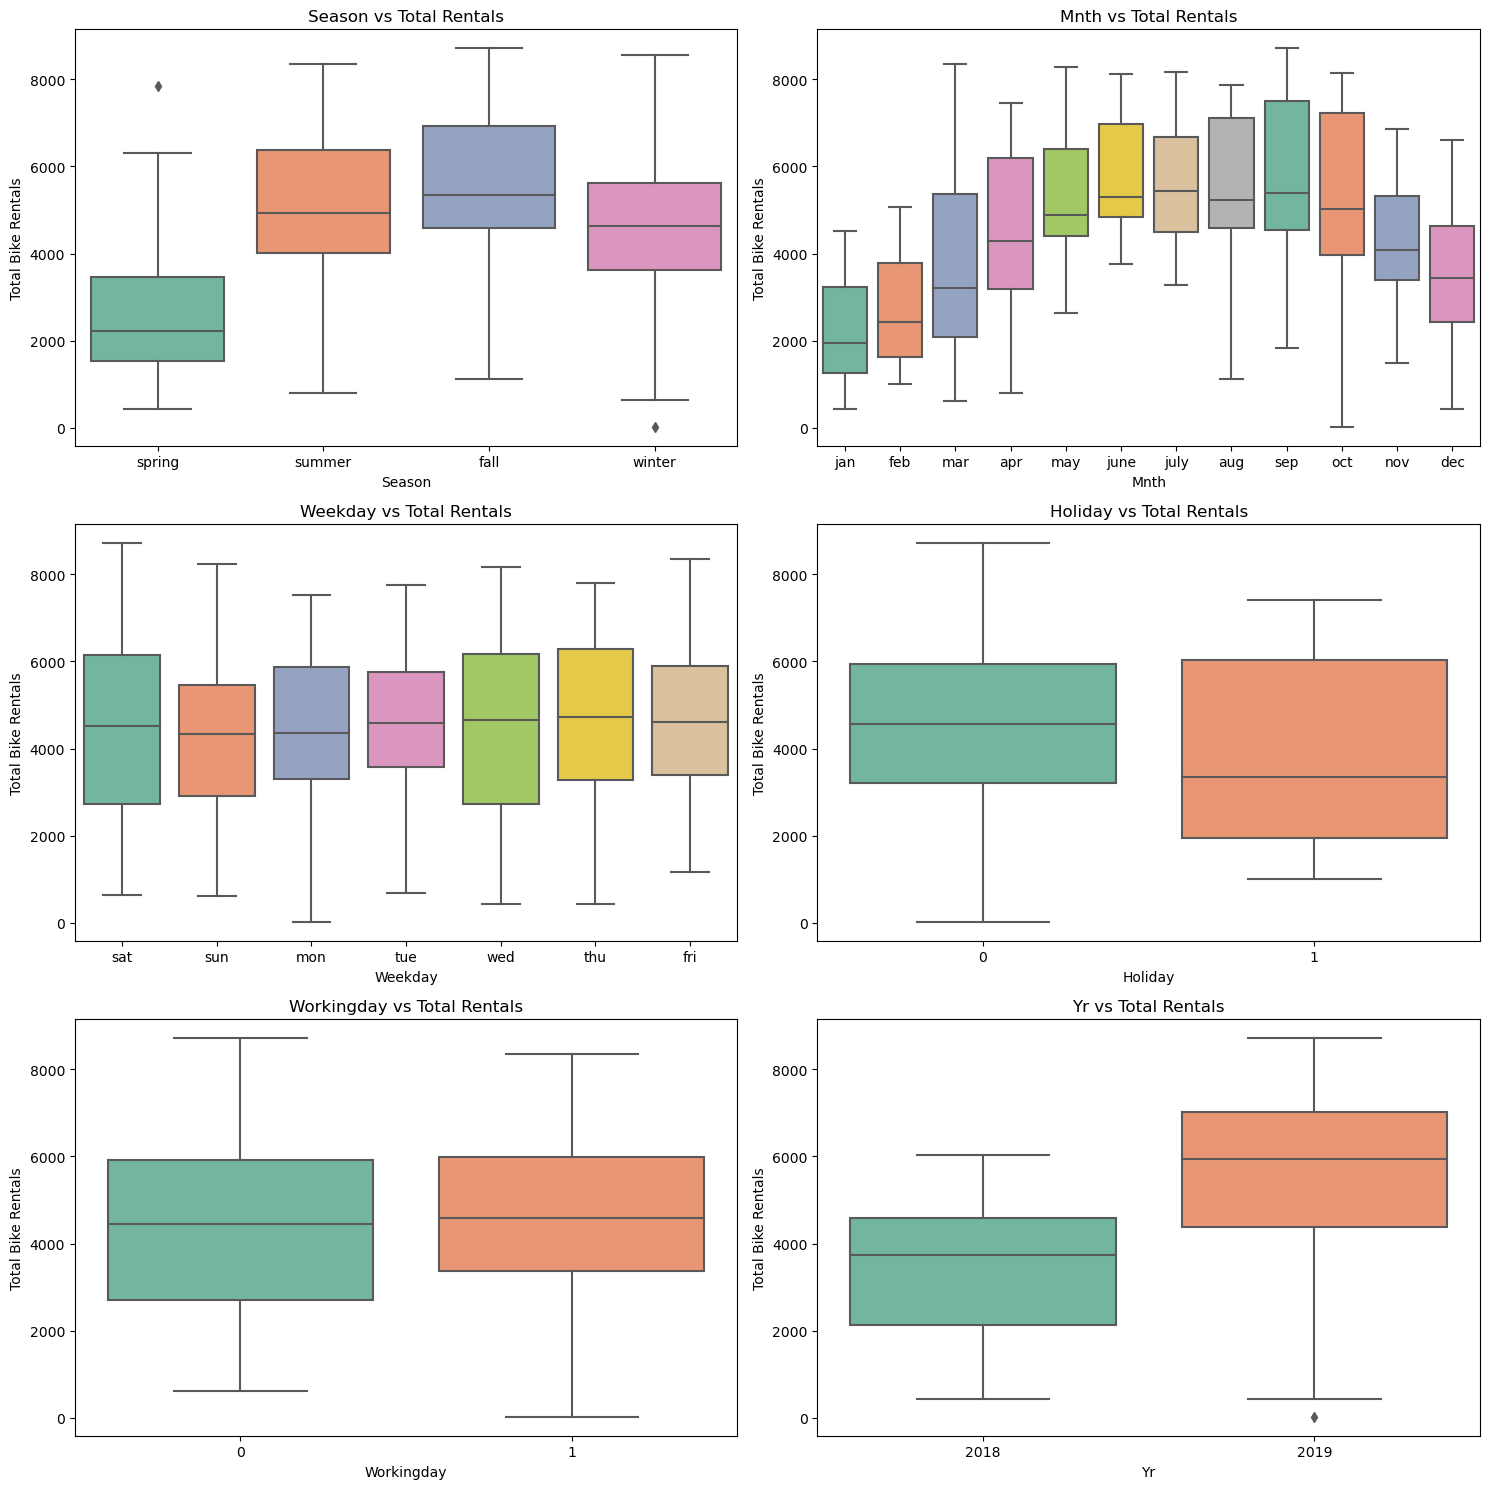

In [18]:
# Categorical columns to visualize
categorical_columns = ['season', 'mnth', 'weekday', 'holiday', 'workingday', 'yr']

# Set the figure size
plt.figure(figsize=(15, 15))

custom_palette = sns.color_palette("Set2")

# Create a grid of subplots
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(3, 2, i)
    
    
    # Create a box plot for the current categorical column
    sns.boxplot(x=col, y='cnt', data=df_for_viz, palette=custom_palette)
    
    # Add labels and titles
    plt.xlabel(col.capitalize())  # Use the column name as the x-axis label
    plt.ylabel('Total Bike Rentals')
    plt.title(f'{col.capitalize()} vs Total Rentals')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

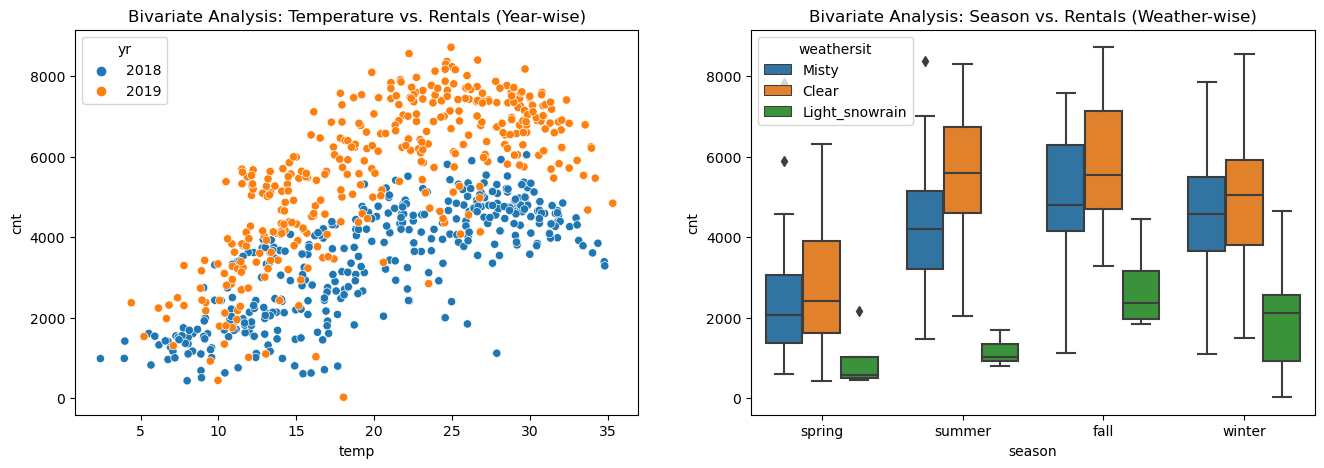

In [19]:
# Bivariate Analysis
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_for_viz, x='temp', y='cnt', hue='yr')
plt.title('Bivariate Analysis: Temperature vs. Rentals (Year-wise)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_for_viz, x='season', y='cnt', hue='weathersit')
plt.title('Bivariate Analysis: Season vs. Rentals (Weather-wise)')

plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:purple;margin:0;color:bule;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Multivariate Analysis </p>


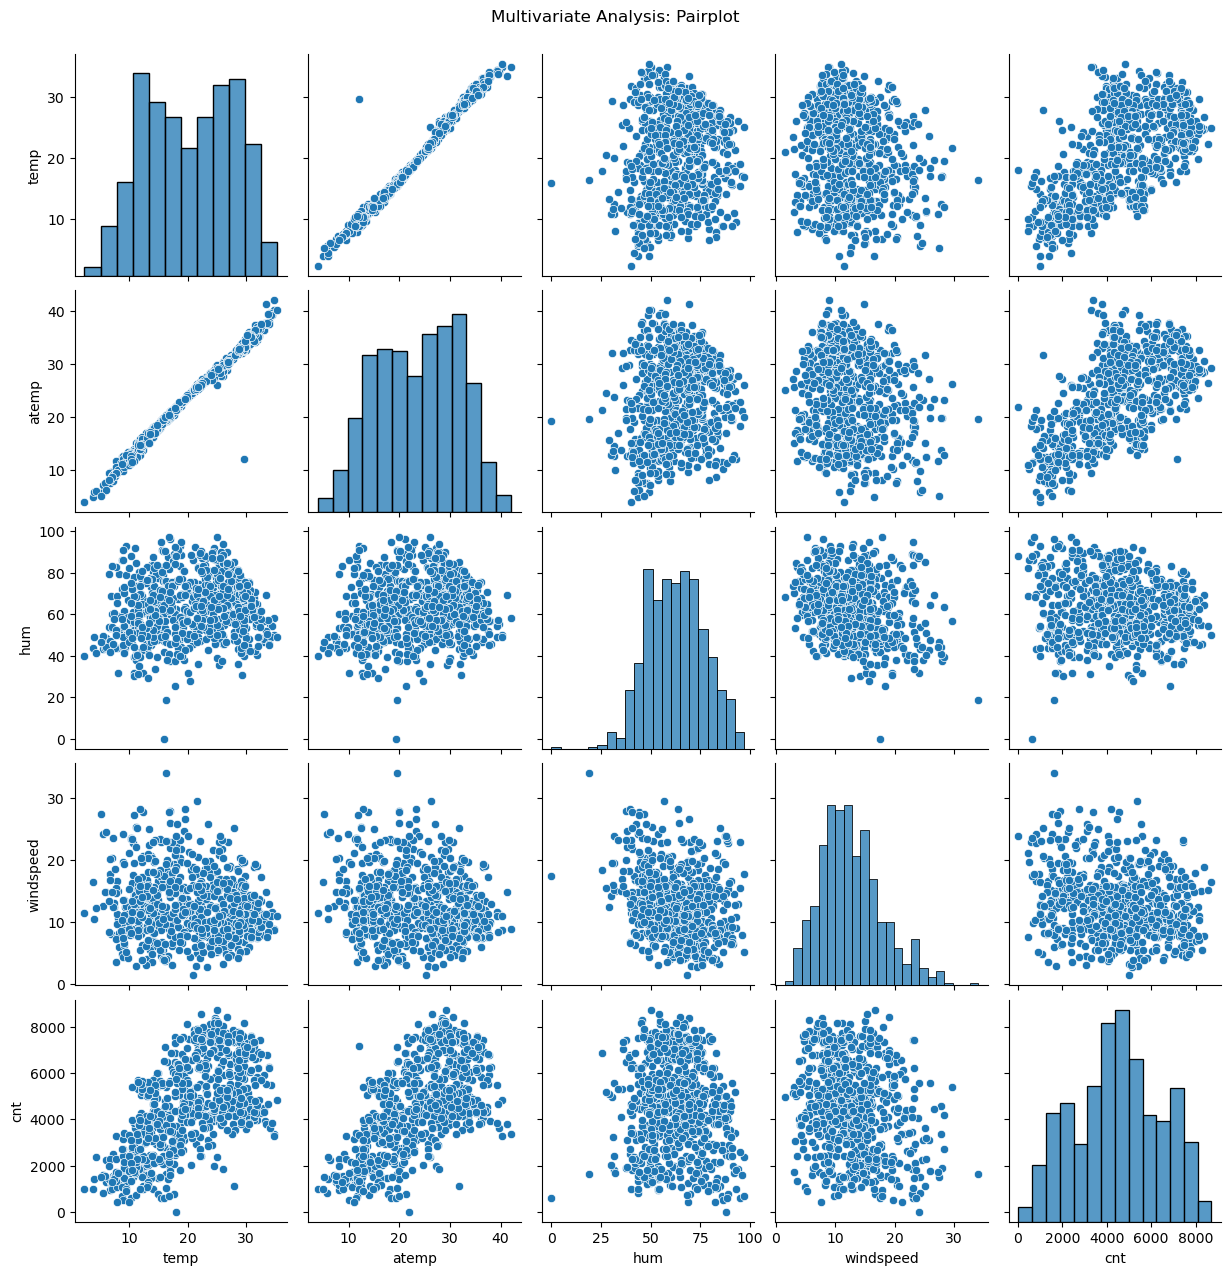

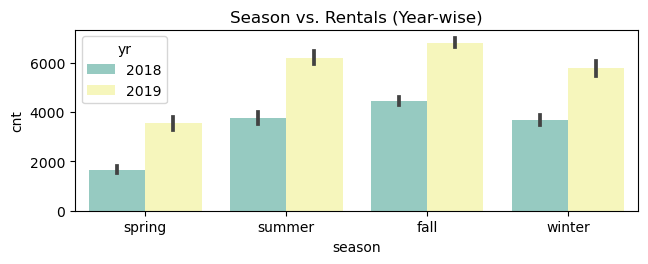

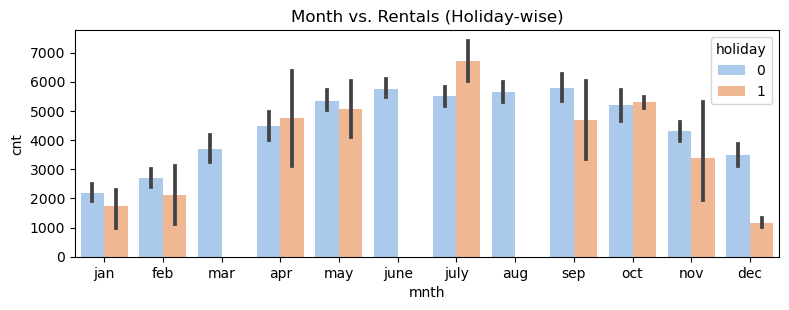

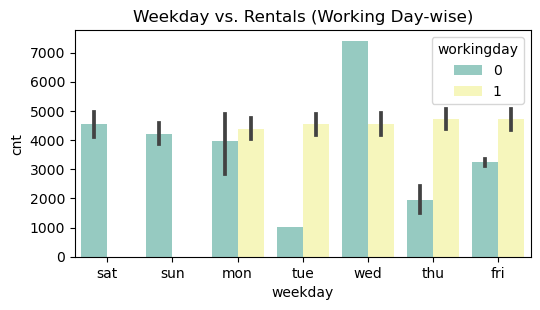

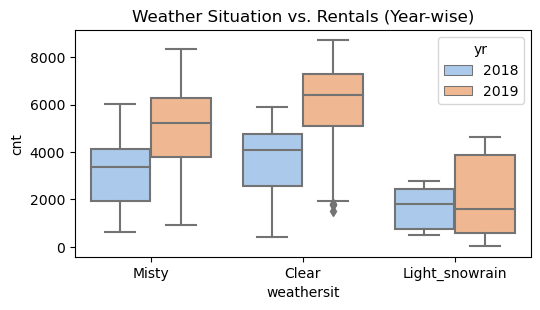

In [20]:
# Define custom color palettes or use Seaborn's built-in palettes
custom_palette1 = sns.color_palette("Set3")  # Custom palette 1
custom_palette2 = sns.color_palette("pastel")  # Custom palette 2

# Pairplot for a comprehensive view of variable relationships
sns.pairplot(data=df_for_viz[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], palette=custom_palette1)
plt.suptitle("Multivariate Analysis: Pairplot", y=1.02)
plt.show()

# Multivariate Analysis: Categorical Variables vs. Rentals
plt.figure(figsize=(16, 8))
plt.subplot(3, 2, 1)
sns.barplot(data=df_for_viz, x='season', y='cnt', hue='yr', palette=custom_palette1)
plt.title('Season vs. Rentals (Year-wise)')

plt.figure(figsize=(20, 10))
plt.subplot(3, 2, 2)
sns.barplot(data=df_for_viz, x='mnth', y='cnt', hue='holiday', palette=custom_palette2)
plt.title('Month vs. Rentals (Holiday-wise)')

plt.figure(figsize=(20, 10))
plt.subplot(3, 3, 2)
sns.barplot(data=df_for_viz, x='weekday', y='cnt', hue='workingday', palette=custom_palette1)
plt.title('Weekday vs. Rentals (Working Day-wise)')

plt.figure(figsize=(20, 10))
plt.subplot(3, 3, 4)
sns.boxplot(data=df_for_viz, x='weathersit', y='cnt', hue='yr', palette=custom_palette2)
plt.title('Weather Situation vs. Rentals (Year-wise)')

plt.show()

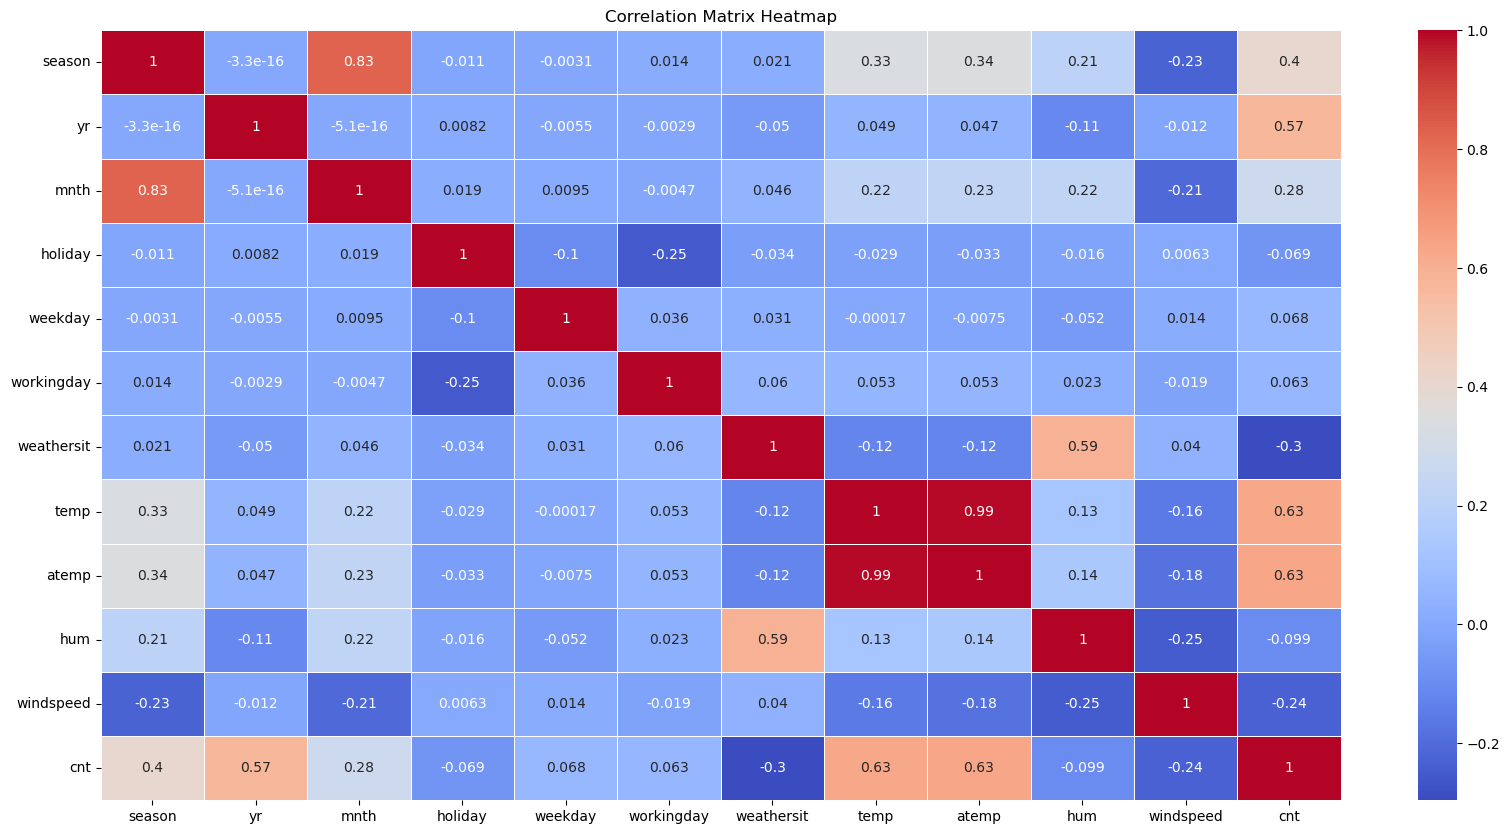

Features sorted by correlation with 'cnt':
cnt           1.000000
atemp         0.630685
temp          0.627044
yr            0.569728
season        0.404584
weathersit    0.295929
mnth          0.278191
windspeed     0.235132
hum           0.098543
holiday       0.068764
weekday       0.067534
workingday    0.062542
Name: cnt, dtype: float64


In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Sort the features based on their correlation with 'cnt' in descending order
sorted_correlations = correlation_matrix['cnt'].abs().sort_values(ascending=False)
print("Features sorted by correlation with 'cnt':")
print(sorted_correlations)

# `Data Preprocessing` 

In [22]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [23]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [24]:
#converting the mnth column which is in numeric to object
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [25]:
# Maping seasons
df.season = df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
# Mapping weathersit
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
#Mapping Weekday
df.weekday = df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [26]:
#checking mapped df
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### `Creating Dummy Variables`

The variables `season` `mnth` `weekday` `weathersit` have various levels, for ex, `weathersit` has 3 levels , similarly variable `mnth` has 12 levels.   
We will create DUMMY variables for these 4 categorical variables namely - `mnth`, `weekday`, `season` & `weathersit`.

In [27]:
df = pd.get_dummies(data=df,columns=['season','mnth','weekday','weathersit'],drop_first=True)

In [28]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [29]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# `Rescaling the Features`

Rescaling is needed in multiple linear regression (MLR) to ensure that all predictor variables are on the same scale, preventing variables with larger ranges from dominating the regression process and ensuring accurate coefficient interpretation.

In [30]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale1 = ['cnt', 'hum', 'windspeed','temp','atemp']
df[scale1] = scaler.fit_transform(df[scale1])
df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,0.243025,0.193709,0.671380,0.675656,0.240681,1,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,1,0.241986,0.230993,0.606684,0.274350,0.353543,1,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0.241986,0.214393,0.774208,0.210260,0.151749,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.497001,0.676936,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0


# `Splitting data into Train and Test data`

In [31]:
#X is all remaining variable also our independent variables
X=df.drop('cnt',axis=1)
#y to contain only target variable
y=df['cnt']

In [32]:
#Train Test split with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.574121,0.329497,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.724079,0.294871,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.638817,0.285911,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.497001,0.676936,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.503427,0.221789,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.648940,0.348724,0.242661,0.246575,0.248532,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145429,0.162675,0.429112,0.431440,0.432585,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041051,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.537703,0.232053,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.652100,0.326911,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.752785,0.438475,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.997858,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,0,1,0,0.831783,0.769660,0.655956,0.121812,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.608826,0.188468,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.835904,0.361537,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.436161,0.366681,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.313625,0.556403,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# Checking shape and size for train and test
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (511, 29)
X_test : (219, 29)
y_train : (511,)
y_test : (219,)


# `Building model `


### `Building model using statsmodel, for the detailed statistics`

## ` Model 1`

In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
#Build a linear model
X_train_lm1 = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm1).fit()
lr_1.params

const                           0.250104
yr                              0.232986
holiday                         0.012658
workingday                      0.098022
temp                            0.386163
atemp                           0.060120
hum                            -0.153379
windspeed                      -0.191652
season_Spring                  -0.045451
season_Summer                   0.042388
season_Winter                   0.106914
mnth_Aug                        0.022625
mnth_Dec                       -0.043962
mnth_Feb                       -0.032352
mnth_Jan                       -0.062992
mnth_Jul                       -0.032381
mnth_Jun                        0.006304
mnth_Mar                        0.001672
mnth_May                        0.025799
mnth_Nov                       -0.039581
mnth_Oct                        0.010721
mnth_Sep                        0.087206
weekday_Monday                 -0.021745
weekday_Saturday                0.096876
weekday_Sunday  

In [38]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.76
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          7.47e-181
Time:                        12:33:52   Log-Likelihood:                 527.86
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     482   BIC:                            -874.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### `VIF`

helps identify multicollinearity, where predictor variables are highly correlated, which can affect the model's reliability.

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,87.20
3,temp,66.89
4,atemp,56.03
22,weekday_Saturday,20.04
23,weekday_Sunday,18.65
7,season_Spring,10.77
9,season_Winter,9.52
8,season_Summer,8.30
18,mnth_Nov,6.79
19,mnth_Oct,6.57


## `Model 2`

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `mnth_mar` has a significantly high VIF (`3.47`) and a high p-value (`0.946`) as well. Hence, this variable isn't of much use and should be dropped.

In [40]:
# Dropping highly correlated variables and insignificant variables
X_ud_2 = X_train.drop('mnth_Mar', axis=1)

In [41]:
# Build a third fitted model
X_train_lm2 = sm.add_constant(X_ud_2)
lr_2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.7
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          7.28e-182
Time:                        12:33:52   Log-Likelihood:                 527.86
No. Observations:                 511   AIC:                            -999.7
Df Residuals:                     483   BIC:                            -881.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [42]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_ud_2.columns
vif['VIF'] = [variance_inflation_factor(X_ud_2.values, i) for i in range(X_ud_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,76.43
3,temp,66.84
4,atemp,55.99
21,weekday_Saturday,17.53
22,weekday_Sunday,16.48
7,season_Spring,9.66
9,season_Winter,9.19
8,season_Summer,7.99
10,mnth_Aug,5.74
14,mnth_Jul,5.11


## `Model 3`

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `atemp` has a significantly high VIF (`55.99`) and a high p-value (`0.665`) as well. Hence, this variable isn't of much use and should be dropped.

In [43]:
# Dropping highly correlated variables and insignificant variables
X_ud_3 = X_ud_2.drop('atemp', axis=1)

In [44]:
# Build a third fitted model
X_train_lm3 = sm.add_constant(X_ud_3)
lr_3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          7.61e-183
Time:                        12:33:52   Log-Likelihood:                 527.76
No. Observations:                 511   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -887.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [45]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_ud_3.columns
vif['VIF'] = [variance_inflation_factor(X_ud_3.values, i) for i in range(X_ud_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,76.40
20,weekday_Saturday,17.53
21,weekday_Sunday,16.48
6,season_Spring,9.65
8,season_Winter,9.17
7,season_Summer,7.96
3,temp,6.89
9,mnth_Aug,5.64
13,mnth_Jul,5.08
16,mnth_Nov,4.86


## `Model 4`

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `season_Spring` has a significantly high VIF (`9.65`) and a high p-value (`0.111`) as well. Hence, this variable isn't of much use and should be dropped.

In [46]:
# Dropping highly correlated variables and insignificant variables
X_ud_4 = X_ud_3.drop('season_Spring', axis=1)

In [47]:
# Build a third fitted model
X_train_lm4 = sm.add_constant(X_ud_4)
lr_4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.7
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          2.39e-183
Time:                        12:33:52   Log-Likelihood:                 526.47
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -890.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [48]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_ud_4.columns
vif['VIF'] = [variance_inflation_factor(X_ud_4.values, i) for i in range(X_ud_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.09
19,weekday_Saturday,11.22
20,weekday_Sunday,10.85
3,temp,6.63
7,season_Winter,6.08
16,mnth_Oct,4.60
15,mnth_Nov,4.58
8,mnth_Aug,3.45
12,mnth_Jul,3.41
9,mnth_Dec,3.31


## `Model 5`

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `weekday_Thrusday` has a significantly high VIF (`1.81`) and a high p-value (`0.563`) as well. Hence, this variable isn't of much use and should be dropped.

In [49]:
# Dropping highly correlated variables and insignificant variables
X_ud_5= X_ud_4.drop('weekday_Thrusday', axis=1)

In [50]:
# Build a third fitted model
X_train_lm5 = sm.add_constant(X_ud_5)
lr_5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.5
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          2.58e-184
Time:                        12:33:52   Log-Likelihood:                 526.29
No. Observations:                 511   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -896.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [51]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_ud_5.columns
vif['VIF'] = [variance_inflation_factor(X_ud_5.values, i) for i in range(X_ud_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,47.44
19,weekday_Saturday,11.22
20,weekday_Sunday,10.85
3,temp,6.63
7,season_Winter,6.08
16,mnth_Oct,4.60
15,mnth_Nov,4.58
8,mnth_Aug,3.45
12,mnth_Jul,3.40
9,mnth_Dec,3.31


## `Model 6`

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `workingday` has a significantly high VIF (`4.44`) and a high p-value (`0.000`) as well. Hence, this variable isn't of much use and should be dropped.

In [52]:
# Dropping highly correlated variables and insignificant variables
X_ud_6= X_ud_5.drop('workingday', axis=1)

In [53]:
# Build a third fitted model
X_train_lm6 = sm.add_constant(X_ud_6)
lr_6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.5
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          2.58e-184
Time:                        12:33:52   Log-Likelihood:                 526.29
No. Observations:                 511   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -896.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [54]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_ud_6.columns
vif['VIF'] = [variance_inflation_factor(X_ud_6.values, i) for i in range(X_ud_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,36.21
3,hum,29.63
6,season_Winter,8.08
4,windspeed,5.23
15,mnth_Oct,5.00
14,mnth_Nov,4.81
5,season_Summer,4.01
7,mnth_Aug,3.80
11,mnth_Jul,3.67
8,mnth_Dec,3.32


## `Model 7`

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `hum` has a significantly high VIF (`29.63`) and a high p-value (`0.000`) as well. Hence, this variable isn't of much use and should be dropped.

In [55]:
# Dropping highly correlated variables and insignificant variables
X_ud_7= X_ud_6.drop('hum', axis=1)

In [56]:
# Build a third fitted model
X_train_lm7 = sm.add_constant(X_ud_7)
lr_7 = sm.OLS(y_train, X_train_lm7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     117.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          8.11e-182
Time:                        12:33:52   Log-Likelihood:                 517.66
No. Observations:                 511   AIC:                            -987.3
Df Residuals:                     487   BIC:                            -885.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [57]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_ud_7.columns
vif['VIF'] = [variance_inflation_factor(X_ud_7.values, i) for i in range(X_ud_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,20.69
5,season_Winter,8.08
3,windspeed,5.23
14,mnth_Oct,4.88
13,mnth_Nov,4.56
4,season_Summer,3.82
6,mnth_Aug,3.76
10,mnth_Jul,3.55
7,mnth_Dec,2.86
15,mnth_Sep,2.84


## `Model 8`

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `season_Winter` has a significantly high VIF (`8.08`) and a high p-value (`0.000`) as well. Hence, this variable isn't of much use and should be dropped.

In [58]:
# Dropping highly correlated variables and insignificant variables
X_ud_8= X_ud_7.drop('season_Winter', axis=1)

In [59]:
# Build a third fitted model
X_train_lm8 = sm.add_constant(X_ud_8)
lr_8 = sm.OLS(y_train, X_train_lm8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     113.3
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          7.34e-176
Time:                        12:33:53   Log-Likelihood:                 500.64
No. Observations:                 511   AIC:                            -955.3
Df Residuals:                     488   BIC:                            -857.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [60]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_ud_8.columns
vif['VIF'] = [variance_inflation_factor(X_ud_8.values, i) for i in range(X_ud_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,20.69
3,windspeed,5.18
4,season_Summer,3.82
5,mnth_Aug,3.76
9,mnth_Jul,3.55
14,mnth_Sep,2.72
10,mnth_Jun,2.27
0,yr,2.11
13,mnth_Oct,2.10
11,mnth_May,2.03


## `Residual Analysis of the Train data`

In [61]:
#X_train_lm8 is the variable for last model 8
y_train_cnt = lr_8.predict(X_train_lm8)
y_train_cnt 

653    0.752028
576    0.751015
426    0.526682
728    0.433778
482    0.590861
         ...   
578    0.843460
53     0.243625
350    0.214100
79     0.299075
520    0.655644
Length: 511, dtype: float64

### `Training Data Model Evaluation:`

In [62]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_cnt)

0.836300326288283

Text(0.5, 0, 'Errors')

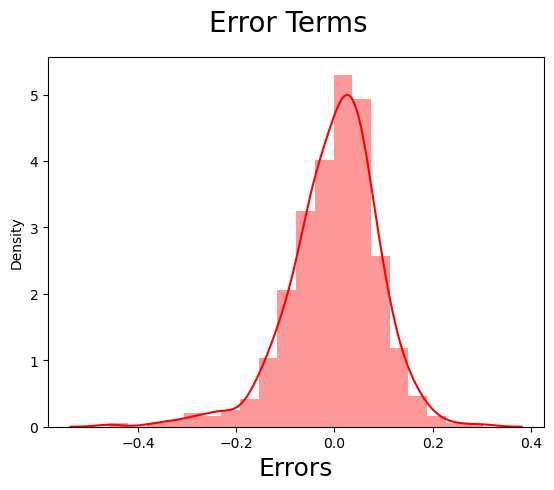

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20,color='red')
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20) 
# X-label
plt.xlabel('Errors', fontsize = 18)                        

# `Making Predictions on Test data for Final Model`

In [64]:
#dropping the columns 
X_test = X_test.drop(['mnth_Mar','atemp','season_Spring','weekday_Thrusday','workingday','hum','season_Winter'],axis=1)
X_test.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Summer', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [65]:
X_test.head()

,yr,holiday,temp,windspeed,season_Summer,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,0,1,0.831783,0.121812,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
535,1,0,0.901354,0.188468,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0.511964,0.361537,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
221,0,0,0.881625,0.366681,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0.817246,0.556403,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## `Rescaling Test Data`

In [66]:
scaler = MinMaxScaler()
X_test_pred = X_test[['yr', 'holiday', 'temp', 'windspeed', 'season_Summer', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy']]

X_test_pred = scaler.fit_transform(X_test_pred)

X_test_pred

array([[0.        , 1.        , 0.83724073, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.91142308, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.49622086, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.57372483, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.7453422 , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.30385535, ..., 0.        , 0.        ,
        0.        ]])

In [67]:
X_test.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Summer', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [68]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [69]:
test_col = X_train_lm8.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   yr                            219 non-null    int64  
 2   holiday                       219 non-null    int64  
 3   temp                          219 non-null    float64
 4   windspeed                     219 non-null    float64
 5   season_Summer                 219 non-null    uint8  
 6   mnth_Aug                      219 non-null    uint8  
 7   mnth_Dec                      219 non-null    uint8  
 8   mnth_Feb                      219 non-null    uint8  
 9   mnth_Jan                      219 non-null    uint8  
 10  mnth_Jul                      219 non-null    uint8  
 11  mnth_Jun                      219 non-null    uint8  
 12  mnth_May                      219 non-null    uint8  
 13  mnth

# `Making predictions on Test data for final model`

In [70]:
#using lr_8 final model 
y_pred = lr_8.predict(X_test)
y_pred

184    0.365727
535    0.905322
299    0.437432
221    0.582496
152    0.567732
         ...   
400    0.339895
702    0.655132
127    0.494818
640    0.818068
72     0.313859
Length: 219, dtype: float64

### `Testing Data Model Evaluation:`

In [71]:
r2_score(y_test, y_pred)

0.791596609342758

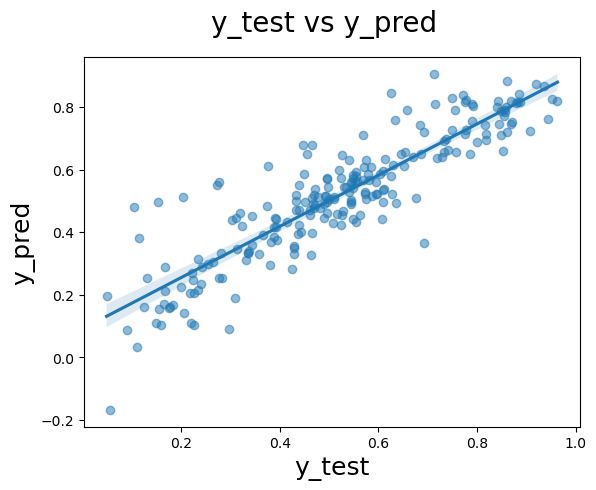

In [72]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)
plt.show()

<a id="1"></a>
# <p style="padding:10px;background-color:blue;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Report for Bike-Sharing System (BoomBikes) Project</p>



## `Key Questions`

The key questions to address in this project are:
1. Identify the significant variables affecting bike demand.
2. Evaluate how well these variables explain the variation in bike demand.

## `Data Exploration`

The project began with data exploration and preprocessing. Here are the key insights:

- The dataset contains 730 entries and 16 columns, including features like season, year, month, holiday, weather conditions, temperature, and bike demand (cnt).
- Data types include integers, floats, and one object column ('dteday').
- No missing values were found in the dataset.

## `Data Visualization`

Data visualization was used to gain insights into the relationships between variables. Some key visualizations include:

- Univariate analysis: Histograms and scatterplots to examine the distribution and relationships of variables.
- Bivariate analysis: Box plots and scatterplots to analyze how categorical variables (e.g., season, month, weekday) and numerical variables (e.g., temperature) affect bike demand.
- Multivariate analysis: Pairplots and bar plots to explore interactions between multiple variables and their impact on bike demand.

## `Data Preprocessing`

Data preprocessing steps included:

1. Encoding categorical variables like season, month, weekday, and weathersit.
2. Scaling numerical variables to ensure they are on the same scale.
3. Creating dummy variables for categorical features to prepare the data for modeling.

## `Model Building`

Multiple linear regression models were built using the statsmodels library. Feature selection was performed iteratively by dropping variables with high VIF values and insignificant p-values. The final model, Model 8, included the following significant variables:

- Year (yr)
- Holiday
- Temperature (temp)
- Windspeed
- Month (except for January and February)
- Weekday (except for Monday)
- Weather conditions (Mist & Cloudy and Light Snow & Rain)

## `Model Evaluation`

The final model, Model 8, was evaluated for its statistical significance and predictive performance. Key model evaluation metrics include:

- **R-squared value:** 0.843 (indicating that 84.3% of the variance in bike demand is explained by the model).
- **AIC and BIC values:** These information criteria were used to assess the goodness of fit, with lower values indicating better fit.
- **Coefficient significance:** All selected variables were statistically significant with p-values less than 0.05.
- **Multicollinearity:** VIF values were used to check for multicollinearity, and all VIF values were below 5.

## `Conclusion`

The final multiple linear regression model provides valuable insights for BoomBikes to predict bike demand accurately.

**Key factors influencing bike demand:**

`1.year`

`2.holiday`

`3.temperature`

`4.windspeed`

`5.month`

`6.weekday`

`7.weather conditions`

This model can help BoomBikes optimize bike availability, marketing strategies, and pricing to meet customer demand effectively and maximize profits post-pandemic.

The model's `R-squared value of 0.843 for training data` and `R-squared value of 0.76 for testing data` indicates that it explains a significant portion of the variance in bike demand. Further refinement and testing on real-world data can enhance its predictive accuracy. BoomBikes can use this model as a foundation to make data-driven decisions and gain a competitive edge in the bike-sharing market.



<a id="1"></a>
# <p style="padding:10px;background-color:purple;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>